# Monte Carlo Tree Search In Action

We are using the Upper Confidence Bound for MCTS

$$
U(s, a) = Q(s, a) + c_{puct} P(s, a) \frac{\sqrt{\sum_b N(s, b)}}{1 + N(s, a)}
$$

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from aegomoku.gomoku_game import GomokuGame as Game
from aegomoku.mcts import MCTS

In [3]:
BOARD_SIZE=15

---
### The initial board

In [11]:
# Yixin says: This is a 100% win for white - I guess we're not quite there, yet...;-(
# stones = "C11F9E9G8F7G7G9H8"
stones = "C11F9E9G8F7G7G9H8I8H7I6I9F6H6H9I5J4"
# stones = "H8G8"

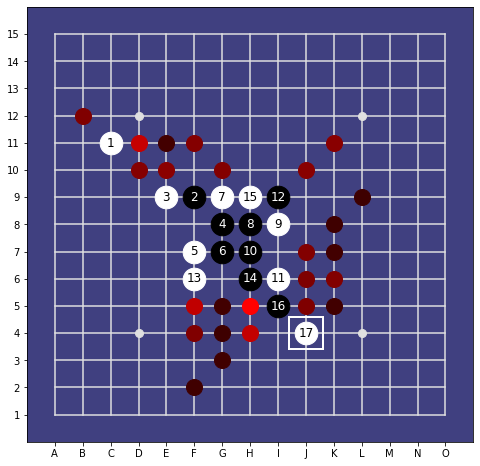

In [12]:
from aegomoku.utils import analyse_board
from aegomoku.policies.heuristic_policy import HeuristicPolicy

policy = HeuristicPolicy(BOARD_SIZE, cut_off=.1)

analyse_board(BOARD_SIZE, stones, policy)

In [13]:
from aegomoku.interfaces import MctsParams
from aegomoku.gomoku_game import ConstantBoardInitializer

the_game = Game(BOARD_SIZE, initializer=ConstantBoardInitializer(stones))

mcts_params = MctsParams(cpuct=1.0, num_simulations=200, advice_cutoff=.3)

brain_d = policy
mcts_d = MCTS(the_game, brain_d, params=mcts_params)

brain_c = policy
mcts_c = MCTS(the_game, brain_c, params=mcts_params)

board = the_game.get_initial_board()
Move=board.Stone

colors = ['Black', 'White']

## Policy-Advised Tree Search clearly establishes the basis for strong play already without deep learning

In [14]:
for i in range(30):

    # weaker and loose challenger
    #
    probs = mcts_c.get_action_prob(board, temperature=1)
    # print(f"Advisable: {[Move(m) for m in brain_d.get_advisable_actions(board.math_rep)]}")
    move = Move(np.random.choice(225, p=probs))
    # print(f"{colors[board.get_current_player()]}: {move}")
    board.act(move)
    if mcts_d.game.get_game_ended(board):
        print(board.stones)
        print("Black wins")
        break

    probs = mcts_d.get_action_prob(board, temperature=0)
    # print(f"Advisable: {[Move(m) for m in brain_d.get_advisable_actions(board.math_rep)]}")
    move = Move(np.random.choice(225, p=probs))
    # print(f"{colors[board.get_current_player()]}: {move}")
    board.act(move)

    print(board.stones)

    if mcts_d.game.get_game_ended(board):
        print("White wins")
        break


[C11, F9, E9, G8, F7, G7, G9, H8, I8, H7, I6, I9, F6, H6, H9, I5, J4, E10, D11]
[C11, F9, E9, G8, F7, G7, G9, H8, I8, H7, I6, I9, F6, H6, H9, I5, J4, E10, D11, H5, H4]
[C11, F9, E9, G8, F7, G7, G9, H8, I8, H7, I6, I9, F6, H6, H9, I5, J4, E10, D11, H5, H4, G5, J5]
[C11, F9, E9, G8, F7, G7, G9, H8, I8, H7, I6, I9, F6, H6, H9, I5, J4, E10, D11, H5, H4, G5, J5, I7, J8]
[C11, F9, E9, G8, F7, G7, G9, H8, I8, H7, I6, I9, F6, H6, H9, I5, J4, E10, D11, H5, H4, G5, J5, I7, J8, F4, E3]
[C11, F9, E9, G8, F7, G7, G9, H8, I8, H7, I6, I9, F6, H6, H9, I5, J4, E10, D11, H5, H4, G5, J5, I7, J8, F4, E3, F5, E5]
[C11, F9, E9, G8, F7, G7, G9, H8, I8, H7, I6, I9, F6, H6, H9, I5, J4, E10, D11, H5, H4, G5, J5, I7, J8, F4, E3, F5, E5, J7, K7]
[C11, F9, E9, G8, F7, G7, G9, H8, I8, H7, I6, I9, F6, H6, H9, I5, J4, E10, D11, H5, H4, G5, J5, I7, J8, F4, E3, F5, E5, J7, K7, E6, G4]
[C11, F9, E9, G8, F7, G7, G9, H8, I8, H7, I6, I9, F6, H6, H9, I5, J4, E10, D11, H5, H4, G5, J5, I7, J8, F4, E3, F5, E5, J7, K7, E6, G4, 

In [15]:
board.plot()

                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  O  .  .  .  .  .  .  .  .  .  .  .  .  .    
11    .  .  X  X  .  O  .  .  .  .  .  .  .  .  .    
10    .  .  O  X  O  .  .  .  .  .  .  .  .  .  .    
 9    .  .  .  X  X  O  X  X  O  .  .  . [X] .  .    
 8    .  .  .  O  X  .  O  O  X  X  X  O  X  O  .    
 7    .  .  .  .  .  X  O  O  O  O  X  .  X  .  .    
 6    .  .  .  .  O  X  .  O  X  .  O  X  X  .  .    
 5    .  .  .  .  X  O  O  O  O  X  X  .  X  .  .    
 4    .  .  .  .  .  O  X  X  O  X  X  .  O  O  .    
 3    .  .  .  .  X  .  .  .  O  X  O  O  .  .  .    
 2    .  .  .  .  .  .  .  .  O  O  .  .  X  .  .    
 1    .  .  .  .  .  .  .  .  X  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


---

## Reviewing the game on the way back

In [20]:
stones = [s.i for s in board.stones]

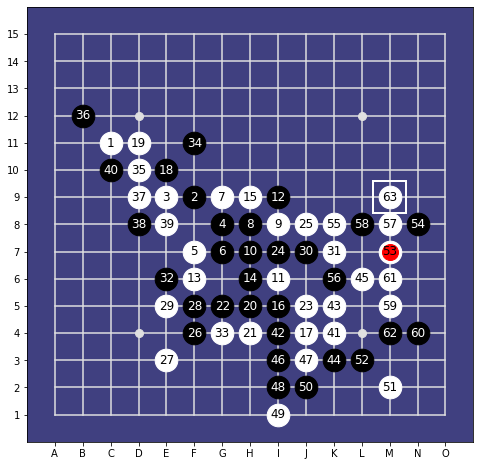

In [21]:
analyse_board(15, stones, policy)

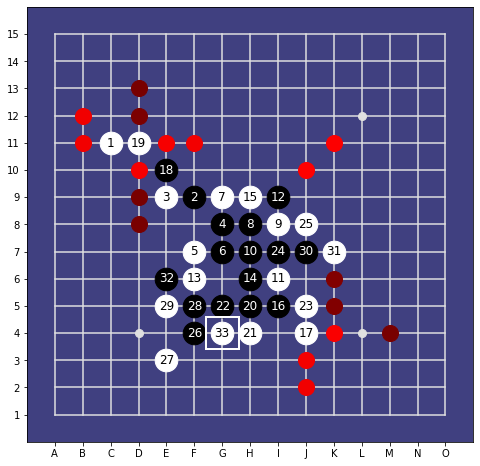

In [23]:
analyse_board(15, stones[:-30], policy)